In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melb-data/melb_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/melb-data/melb_data.csv')
df.shape

(18396, 22)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [6]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
df.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
type_mapping = {
    "h": "house",
    "u": "unit",
    "t": "townhouse"
}

# Map the values in the "Type" column
df["Type"] = df["Type"].map(type_mapping)

In [9]:
method = {}

In [10]:
null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [11]:
null_columns

Index(['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

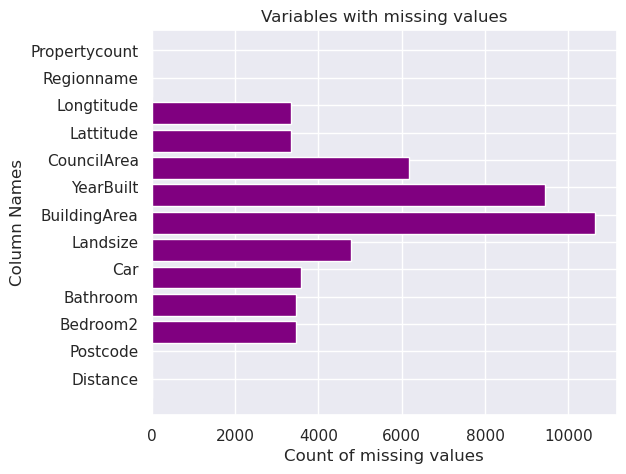

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

# pd.options.display.mpl_style = 'default'
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [13]:
categorical_columns = [ cname for cname in df.columns if
                      df[cname].nunique() < 20 and
                      df[cname].dtypes in ['object','int64','float64']]

# numerical_columns = [cname for cname in df.columns if
#                     df[cname].dtype in ['int64','float64']]
# categorical_cols = [cname for cname in train.columns if
#                     train[cname].nunique() < 10 and 
#                     train[cname].dtype == "object"]

In [14]:
categorical_columns

['Rooms', 'Type', 'Method', 'Bedroom2', 'Bathroom', 'Car', 'Regionname']

In [15]:
# numerical_columns

# Value Count for Categorical Data

In [16]:
for name in categorical_columns:
    print(name)
    print(df[name].value_counts())

Rooms
3     7953
2     4992
4     3648
1      909
5      773
6       92
7       13
8       10
10       4
9        1
12       1
Name: Rooms, dtype: int64
Type
house        12095
unit          4296
townhouse     2005
Name: Type, dtype: int64
Method
S     12034
SP     2349
PI     2189
VB     1696
SA      128
Name: Method, dtype: int64
Bedroom2
3.0     6463
2.0     4124
4.0     2864
1.0      763
5.0      604
6.0       71
0.0       16
7.0       12
8.0        5
9.0        3
20.0       1
10.0       1
Name: Bedroom2, dtype: int64
Bathroom
1.0    8193
2.0    5532
3.0    1013
4.0     114
0.0      34
5.0      30
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64
Car
2.0     6183
1.0     6072
0.0     1057
3.0      809
4.0      549
5.0       66
6.0       60
8.0       12
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64
Regionname
Southern Metropolitan         6343
Northern Metropolitan         5307
Western Metropolitan          3887
Eastern Metropolitan          1995
Sout

# Visualization

In [17]:
import seaborn as sns


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

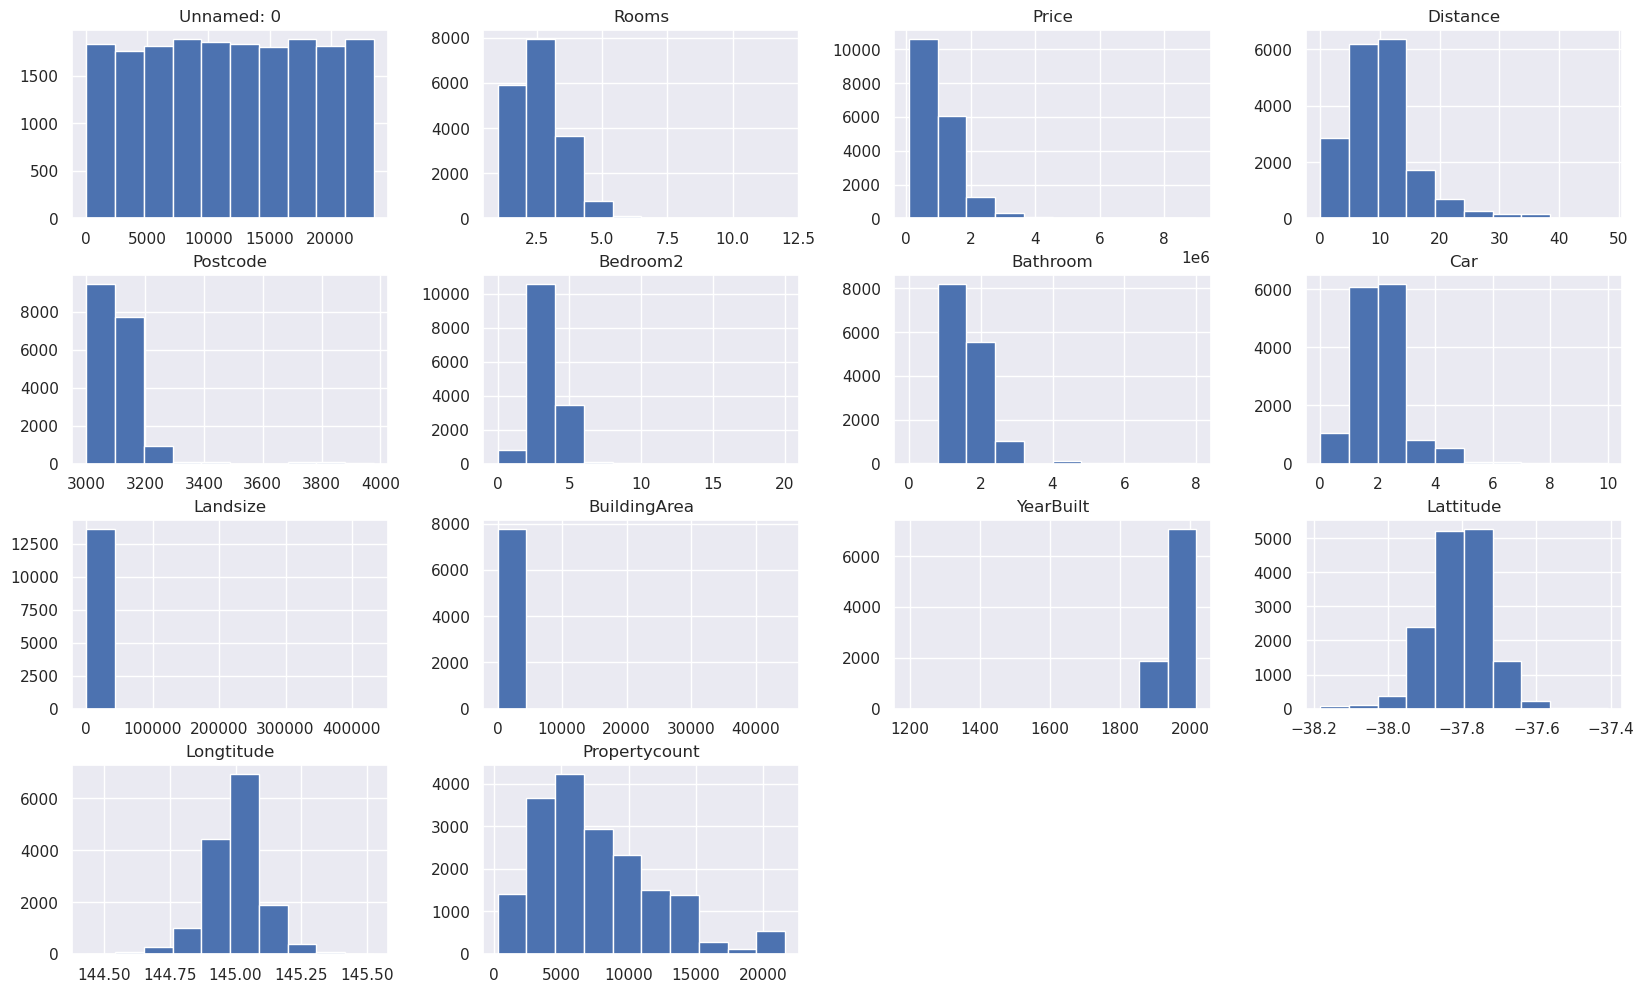

In [18]:
df.hist(bins = 10,figsize=(20,12),grid=True)

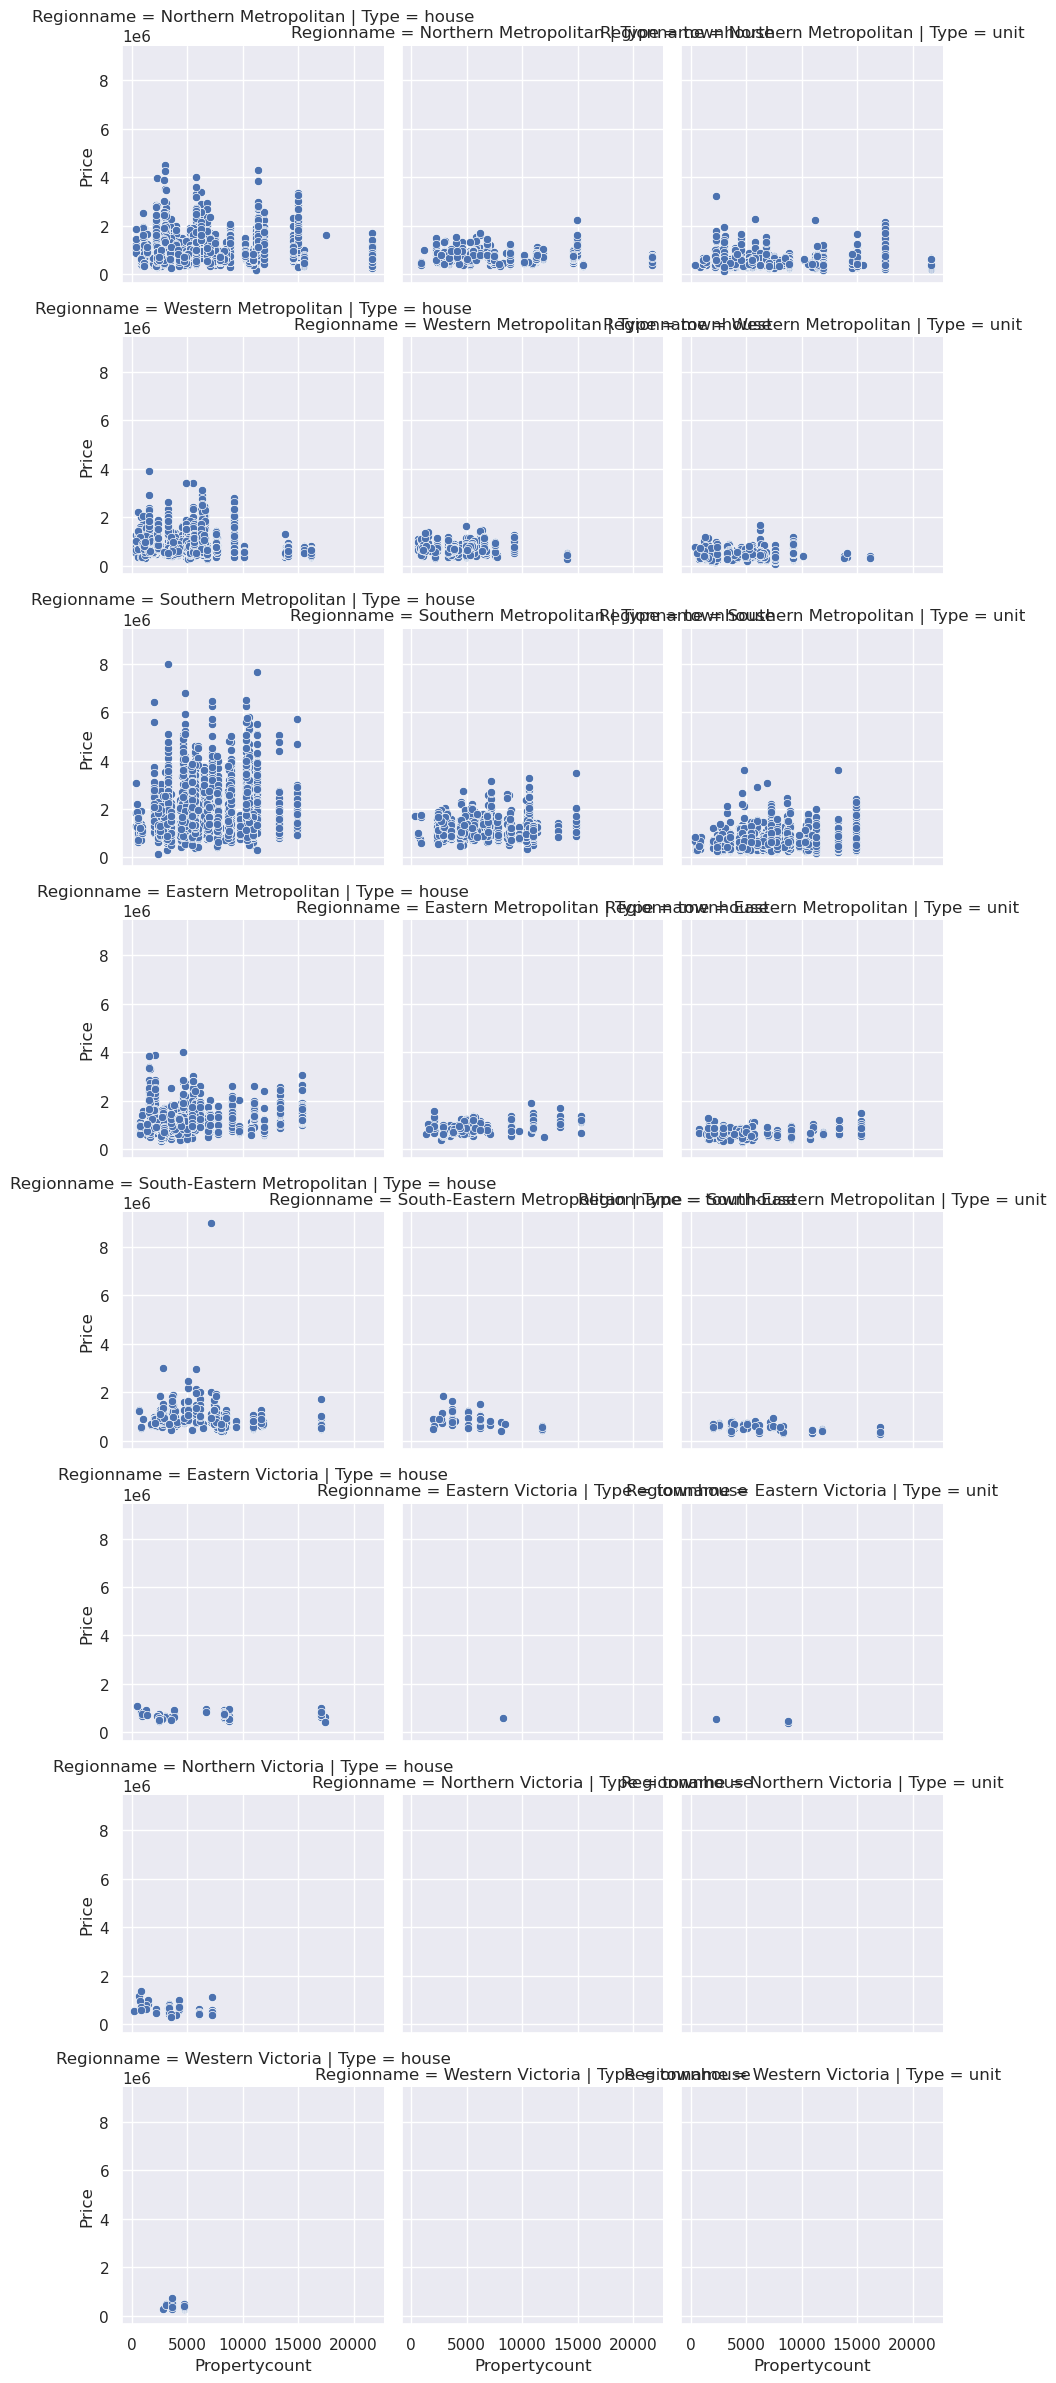

In [19]:
# plt.figure(figsize=(20,20))
g = sns.FacetGrid(df,col='Type',row='Regionname')
g.map_dataframe(sns.scatterplot,"Propertycount","Price")

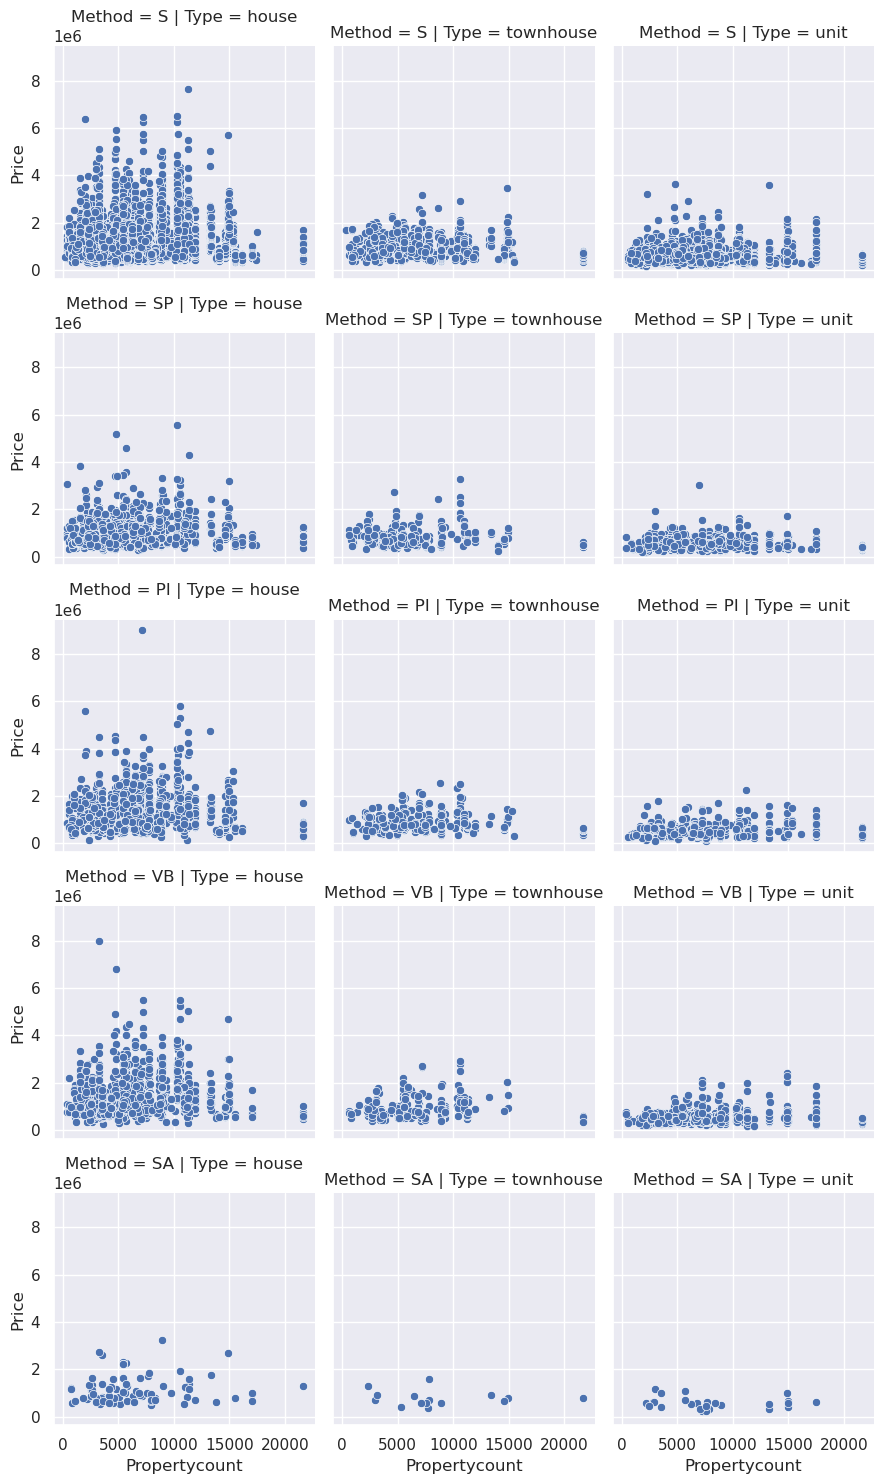

In [20]:
# plt.figure(figsize=(20,20))
g = sns.FacetGrid(df,col='Type',row='Method')
g.map_dataframe(sns.scatterplot,"Propertycount","Price")